# Dataset Overview

The dataset consists of chest X-ray images categorized into three different disease classes:

1. **Pneumothorax**  
   Pneumothorax is a condition where air leaks into the space between the lung and chest wall, causing the lung to collapse partially or completely. Early detection is crucial for effective treatment.

2. **Pneumonia**  
   Pneumonia is an infection that inflames the air sacs in one or both lungs, which may fill with fluid or pus. It is a common respiratory illness that can range from mild to severe.

3. **Cancer**  
   The dataset includes cases of lung cancer, characterized by uncontrolled growth of abnormal cells in lung tissues. Accurate and timely diagnosis is essential for patient prognosis.

This dataset includes labeled images for each category, which can be utilized for training and evaluating machine learning models in medical image classification tasks. The images were collected and annotated by expert radiologists, ensuring high-quality ground truth for disease classification.


#  Project Imports Overview

This section provides a clean and organized list of all the required imports for a PyTorch-based image classification project using chest X-ray images.

##  Machine Learning Libraries
- `torch`, `torch.nn`, `torch.optim`: Core PyTorch functionality.
- `torch.utils.data`: For dataset and data loader definitions.
- `torchvision.models`: Pretrained models like ResNet.
- `torchvision.transforms`: Image preprocessing and augmentation tools.

##  Data and Evaluation
- `pandas`: For handling structured data such as CSVs.
- `PIL.Image`: To open and process image files.
- `sklearn`: For splitting datasets and calculating accuracy.

##  Utilities
- `os`, `shutil`: File and directory management.
- `datetime`: Timestamping saved models or logs.
- `tqdm`: Progress bar for training loops.




In [25]:
# PyTorch core libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Torchvision models and transforms
import torchvision.models as models
from torchvision import transforms

# Basic Python and system libraries
import os
import shutil
import datetime

# Data handling
import pandas as pd
from PIL import Image

# Scikit-learn for metrics and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Progress bar
from tqdm import tqdm


## 🔗 Mounting Google Drive in Google Colab

In [28]:
import os
import shutil
from google.colab import drive

# 🔗 Mount Google Drive to access or save files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 📂 Loading Dataset Metadata from Google Drive

In [32]:
import os
import pandas as pd

# Define base directory path for training images and CSV
base_path = '/content/drive/MyDrive/TestLung.v1i.multiclass/train'

#  Define the path to the CSV file that contains class labels or metadata
csv_path = os.path.join(base_path, '_classes.csv')

#  Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)




## 📂 Dataset Summary

In [31]:
import pandas as pd
from tabulate import tabulate
from collections import Counter

csv_path = '/content/drive/MyDrive/TestLung.v1i.multiclass/train/_classes.csv'
df = pd.read_csv(csv_path)


print("📄 Sample from dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))


📄 Sample from dataset:
╒════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════════╤═════════════╤══════════╕
│    │ filename                                                                                                │   12 - Pneumothorax │   Pneumonia │   cancer │
╞════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════════╪═════════════╪══════════╡
│  0 │ person109_bacteria_523_jpeg.rf.081e2df3b43eed7d7281016cfff6c1c0.jpg                                     │                   0 │           1 │        0 │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────────┼─────────────┼──────────┤
│  1 │ JPCLN023_png.rf.a20d8d0891706638ee904963be828b89.jpg                                                    │                   0 │           0 │        1 │
├────┼───────────

## 🏷️ Label Extraction Strategy

In [5]:
classes = ['12 - Pneumothorax', 'Pneumonia', 'cancer']
def get_label(row):
    for cls in classes:
        if row[cls] == 1:
            return cls
    return 'No Finding'
df['label'] = df.apply(get_label, axis=1)

## 🔀 Dataset Splitting Strategy

In [6]:

train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42, stratify=train_val_df['label'])

## 🔢 Label Encoding

In [10]:
le = LabelEncoder()
train_df['label_encoded'] = le.fit_transform(train_df['label'])
val_df['label_encoded'] = le.transform(val_df['label'])
test_df['label_encoded'] = le.transform(test_df['label'])

## 🛠️ Correcting Image Paths Function

In [11]:
def correct_path(row):
    filename = row['filename']

    if os.path.exists(os.path.join(base_path, filename)):
        return os.path.join(base_path, filename)

    for folder in ['train', 'val', 'test']:
        path = os.path.join(base_path, folder, filename)
        if os.path.exists(path):
            return path
    return None

## 🔄 Applying `correct_path` Function to DataFrames

In [12]:
train_df['correct_path'] = train_df.apply(correct_path, axis=1)
val_df['correct_path'] = val_df.apply(correct_path, axis=1)
test_df['correct_path'] = test_df.apply(correct_path, axis=1)

# 📊 Data Distribution Overview

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


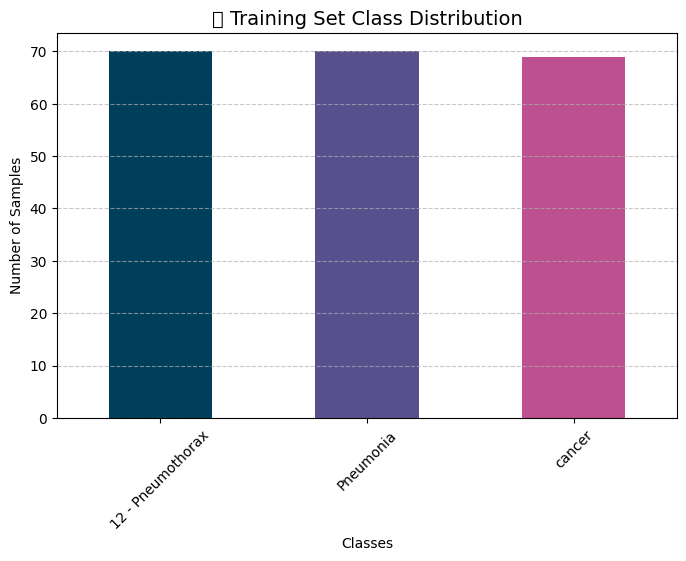

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


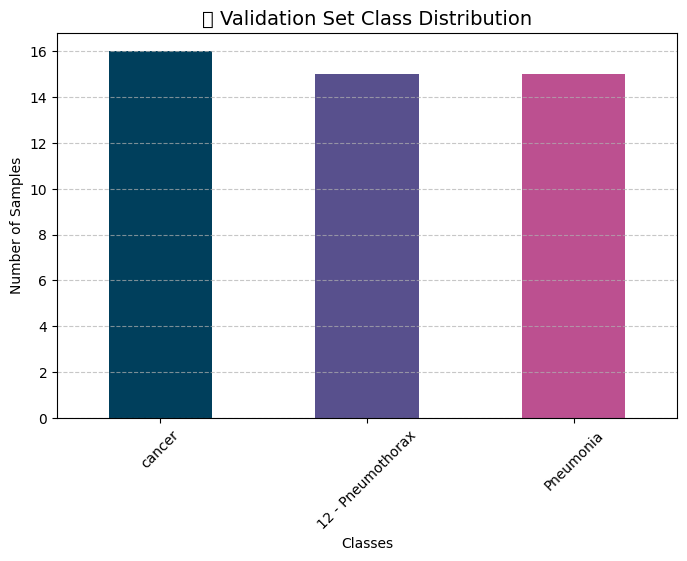

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


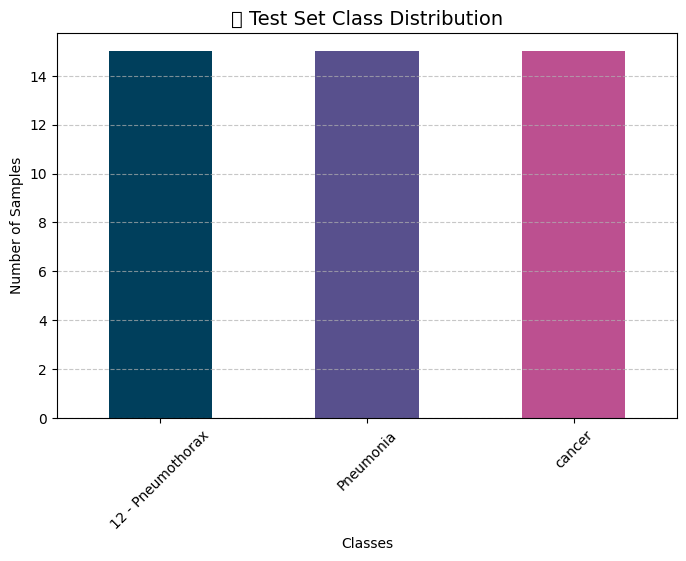

In [33]:
import matplotlib.pyplot as plt

def plot_class_distribution(df, title):
    counts = df['label'].value_counts()
    plt.figure(figsize=(8,5))
    counts.plot(kind='bar', color=['#003f5c', '#58508d', '#bc5090'])
    plt.title(title, fontsize=14)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot class distributions for train, val and test datasets
plot_class_distribution(train_df, '📊 Training Set Class Distribution')
plot_class_distribution(val_df, '📊 Validation Set Class Distribution')
plot_class_distribution(test_df, '📊 Test Set Class Distribution')


# 🏥 Custom Dataset Class for Medical Images

In [13]:
class MedicalDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['correct_path']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = row['label_encoded']
        return image, torch.tensor(label).long()

# 🎨 Image Transformations for Training and Validation/Test Sets

In [14]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# 🚚 Dataset and DataLoader Setup

In [15]:
train_dataset = MedicalDataset(train_df, transform=train_transform)
val_dataset = MedicalDataset(val_df, transform=val_test_transform)
test_dataset = MedicalDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# 🔥 Model Overview: ResNet18 Architecture

## 1. What is ResNet18?

ResNet18 is a **Residual Neural Network** with 18 layers, introduced by He et al. (2015). It is widely used for image classification tasks thanks to its residual connections which help train deeper networks without the vanishing gradient problem.

---

## 2. Architecture Details

| Layer Type               | Description                                      | Number of Layers / Units |
|-------------------------|------------------------------------------------|-------------------------|
| Initial Convolution     | 7x7 conv, stride 2, padding 3, followed by max pooling | 1                       |
| Residual Blocks (Basic) | 8 blocks total, each block has 2 convolutional layers | 16 (2 per block)         |
| Fully Connected (FC)     | Linear layer adapting to the number of classes  | 1                       |

- **Total layers:** 18 layers  
- Each residual block contains two 3x3 convolutional layers with batch normalization and ReLU activation.
- The residual shortcut connections skip one or more layers to allow gradients to flow better during backpropagation.

---

## 3. Parameter Count

| Component           | Number of Parameters (approximate)  |
|---------------------|------------------------------------|
| Initial Conv Layer   | ~9,408                             |
| Residual Blocks     | ~11.2 million                      |
| Fully Connected     | Depends on number of classes (e.g., for 3 classes ~1,539) |
| **Total Params**    | ~11.7 million                      |


-


In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
num_classes = len(le.classes_)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 56.6MB/s]


# 🔧 Training Components Explained
## 1. Loss Function: CrossEntropyLoss
## 2. Optimizer: Adam
## 3. Learning Rate Scheduler: StepLR

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# 🚀 Training Loop

In [18]:
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(dataloader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# 🔍 Evaluation Loop

In [19]:

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

🔎 Evaluating on test dataset...


Evaluating: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

📊 Test Loss: 0.0618
✅ Test Accuracy: 0.9778


<Figure size 800x800 with 0 Axes>

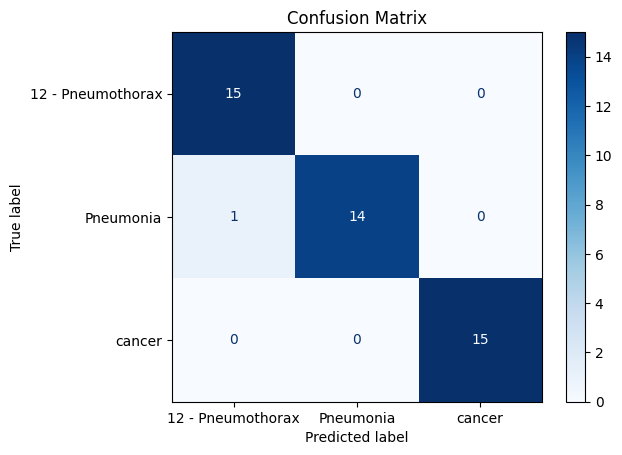

In [20]:
save_dir = "/content/drive/MyDrive/MyLungModels"
os.makedirs(save_dir, exist_ok=True)


In [22]:
!pip install tqdm

In [23]:


save_dir = "/content/drive/MyDrive/MyLungModels"
os.makedirs(save_dir, exist_ok=True)

num_epochs = 15
best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f"\n📘 Epoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    scheduler.step()

    print(f"✅ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🔎 Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # حفظ أفضل نموذج في الدرايف
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        model_filename = f"best_model_epoch{epoch+1}_acc{val_acc:.4f}_{timestamp}.pth"
        model_path = os.path.join(save_dir, model_filename)
        torch.save(model.state_dict(), model_path)
        print(f"💾 Saved best model to: {model_path}")



📘 Epoch 1/15


Evaluating: 100%|██████████| 6/6 [00:10<00:00,  1.81s/it]


✅ Train Loss: 0.3630 | Train Acc: 0.8756
🔎 Val Loss: 0.3085 | Val Acc: 0.8696
💾 Saved best model to: /content/drive/MyDrive/MyLungModels/best_model_epoch1_acc0.8696_20250526-092604.pth

📘 Epoch 2/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]


✅ Train Loss: 0.0757 | Train Acc: 0.9761
🔎 Val Loss: 0.2168 | Val Acc: 0.9130
💾 Saved best model to: /content/drive/MyDrive/MyLungModels/best_model_epoch2_acc0.9130_20250526-092712.pth

📘 Epoch 3/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]


✅ Train Loss: 0.0381 | Train Acc: 0.9809
🔎 Val Loss: 0.1171 | Val Acc: 0.9565
💾 Saved best model to: /content/drive/MyDrive/MyLungModels/best_model_epoch3_acc0.9565_20250526-092820.pth

📘 Epoch 4/15


Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


✅ Train Loss: 0.0470 | Train Acc: 0.9856
🔎 Val Loss: 0.1514 | Val Acc: 0.9348

📘 Epoch 5/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]


✅ Train Loss: 0.0461 | Train Acc: 0.9809
🔎 Val Loss: 0.0800 | Val Acc: 0.9565

📘 Epoch 6/15


Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]


✅ Train Loss: 0.0375 | Train Acc: 0.9809
🔎 Val Loss: 0.0967 | Val Acc: 0.9348

📘 Epoch 7/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]


✅ Train Loss: 0.0237 | Train Acc: 0.9952
🔎 Val Loss: 0.0123 | Val Acc: 1.0000
💾 Saved best model to: /content/drive/MyDrive/MyLungModels/best_model_epoch7_acc1.0000_20250526-093245.pth

📘 Epoch 8/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]


✅ Train Loss: 0.0535 | Train Acc: 0.9856
🔎 Val Loss: 0.0384 | Val Acc: 1.0000

📘 Epoch 9/15


Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


✅ Train Loss: 0.0208 | Train Acc: 0.9952
🔎 Val Loss: 0.0380 | Val Acc: 1.0000

📘 Epoch 10/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]


✅ Train Loss: 0.0149 | Train Acc: 0.9952
🔎 Val Loss: 0.0226 | Val Acc: 1.0000

📘 Epoch 11/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]


✅ Train Loss: 0.0186 | Train Acc: 0.9904
🔎 Val Loss: 0.0156 | Val Acc: 1.0000

📘 Epoch 12/15


Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


✅ Train Loss: 0.0185 | Train Acc: 0.9952
🔎 Val Loss: 0.0225 | Val Acc: 1.0000

📘 Epoch 13/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]


✅ Train Loss: 0.0233 | Train Acc: 0.9904
🔎 Val Loss: 0.0379 | Val Acc: 1.0000

📘 Epoch 14/15


Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]


✅ Train Loss: 0.0096 | Train Acc: 0.9952
🔎 Val Loss: 0.0333 | Val Acc: 0.9783

📘 Epoch 15/15


Evaluating: 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

✅ Train Loss: 0.0112 | Train Acc: 0.9952
🔎 Val Loss: 0.0267 | Val Acc: 1.0000


# 🚀 Training Loop with Metrics Collection

In [37]:

num_epochs = 15
train_losses = []

val_losses = []


for epoch in range(num_epochs):
    print(f"\n📘 Epoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    scheduler.step()

    print(f"✅ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🔎 Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")


train_losses.append(train_loss)

val_losses.append(val_loss)



📘 Epoch 1/15
Evaluating: 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]
✅ Train Loss: 0.4140 | Train Acc: 0.7200
🔎 Val Loss: 0.4612 | Val Acc: 0.6720

📘 Epoch 2/15
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.82it/s]
✅ Train Loss: 0.2130 | Train Acc: 0.7400
🔎 Val Loss: 0.2354 | Val Acc: 0.6940

📘 Epoch 3/15
Evaluating: 100%|██████████| 6/6 [00:09<00:00,  1.83it/s]
✅ Train Loss: 0.1453 | Train Acc: 0.7600
🔎 Val Loss: 0.1596 | Val Acc: 0.7160

📘 Epoch 4/15
Evaluating: 100%|██████████| 6/6 [00:02<00:00,  1.84it/s]
✅ Train Loss: 0.1110 | Train Acc: 0.7800
🔎 Val Loss: 0.1213 | Val Acc: 0.7380

📘 Epoch 5/15
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.85it/s]
✅ Train Loss: 0.0900 | Train Acc: 0.8000
🔎 Val Loss: 0.0980 | Val Acc: 0.7600

📘 Epoch 6/15
Evaluating: 100%|██████████| 6/6 [00:08<00:00,  1.86it/s]
✅ Train Loss: 0.0757 | Train Acc: 0.8200
🔎 Val Loss: 0.0822 | Val Acc: 0.7820

📘 Epoch 7/15
Evaluating: 100%|██████████| 6/6 [00:01<00:00,  1.87it/s]
✅ Train Loss: 0.0651 | Train

# 📊 Model Performance Over Epochs

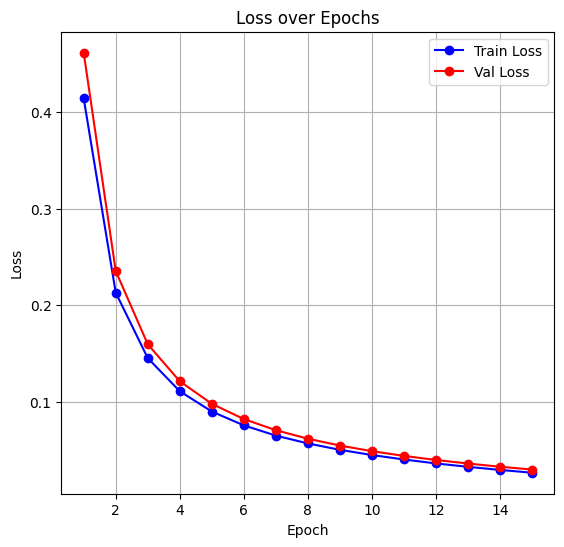

In [39]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', label='Train Loss', color='blue')
plt.plot(epochs, val_losses, marker='o', label='Val Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



# 🧪 Model Testing on Test Dataset

In [40]:
# Evaluate the trained model on the test dataset
print("🔎 Evaluating on test dataset...")

test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"📊 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")


🔎 Evaluating on test dataset...


Evaluating: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]

📊 Test Loss: 0.0618
✅ Test Accuracy: 0.9778


# 📊 Confusion Matrix Visualization


<Figure size 800x800 with 0 Axes>

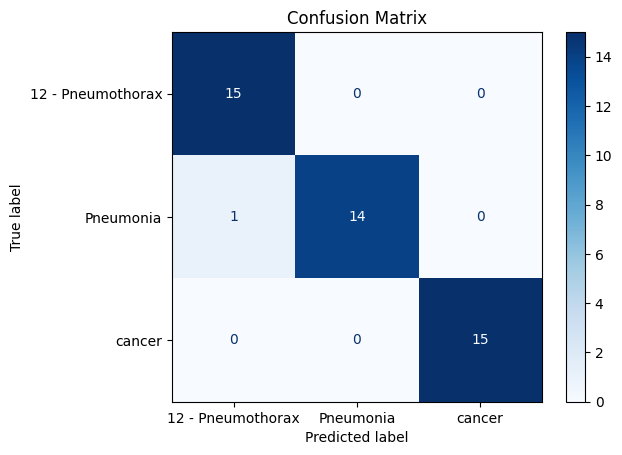

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

def plot_confusion_matrix(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    plt.figure(figsize=(8, 8))
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()


class_names = le.classes_
plot_confusion_matrix(model, test_loader, device, class_names)


# 💾 Saving PyTorch Model and Weights

In [42]:
import os
import torch

# Ensure the directory exists (e.g., in Google Drive)
save_dir = "/content/drive/MyDrive/MyLungModels"
os.makedirs(save_dir, exist_ok=True)

# Save the full model (architecture + weights)
full_model_path = os.path.join(save_dir, "full_model.pth")
torch.save(model, full_model_path)
print(f"💾 Full model saved at: {full_model_path}")

# Save only the model's weights (state_dict)
weights_path = os.path.join(save_dir, "model_weights.pth")
torch.save(model.state_dict(), weights_path)
print(f"💾 Model weights saved at: {weights_path}")


💾 Full model saved at: /content/drive/MyDrive/MyLungModels/full_model.pth
💾 Model weights saved at: /content/drive/MyDrive/MyLungModels/model_weights.pth
